In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import *
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%%time
mnist = fetch_openml("mnist_784")

CPU times: user 18.7 s, sys: 203 ms, total: 18.9 s
Wall time: 18.9 s


In [3]:
images = mnist.data
targets = mnist.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.3, random_state=123, stratify=targets)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
target_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [32]:
import seaborn as sns

def test_svm(X_train, X_test, y_train, y_test, label):
    clf = SVC(kernel="linear", C=0.01)
    clf.fit(X_train, y_train)
    
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    
    print("y_pred : ", y_pred, "\n\n")
    print("predicting time : ", end_time - start_time)
    
    cv_report = classification_report(y_test, y_pred, labels=label)
    print("cv_report\n", cv_report)
    
    res_SVM = []
    res_SVM.append([accuracy_score(y_test, y_pred),
              precision_score(y_test, y_pred, average="macro"),
              recall_score(y_test, y_pred, average="macro"),
              f1_score(y_test, y_pred, average="macro")])
    
    # scores
    res_pd = pd.DataFrame(res_SVM, columns = ["Accuracy", "Precision", "Recall", "F1-score"], index=["SVM"])
    print(res_pd)
    
    # confusion matrix
    cmat = confusion_matrix(y_test, y_pred, target_name)
    sns.set_palette("husl")
    plt.figure(figsize=(12,6))
    sns.heatmap(cmat, annot=True)

y_pred :  ['3' '6' '1' ... '2' '4' '9'] 


predicting time :  129.95973229408264


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:564: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


cv_report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2071
           1       0.96      0.98      0.97      2363
           2       0.93      0.94      0.93      2097
           3       0.92      0.92      0.92      2142
           4       0.93      0.95      0.94      2047
           5       0.90      0.91      0.91      1894
           6       0.97      0.96      0.96      2063
           7       0.96      0.93      0.95      2188
           8       0.94      0.91      0.92      2048
           9       0.93      0.93      0.93      2087

   micro avg       0.94      0.94      0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000

     Accuracy  Precision    Recall  F1-score
SVM  0.941905   0.941301  0.941153  0.941147


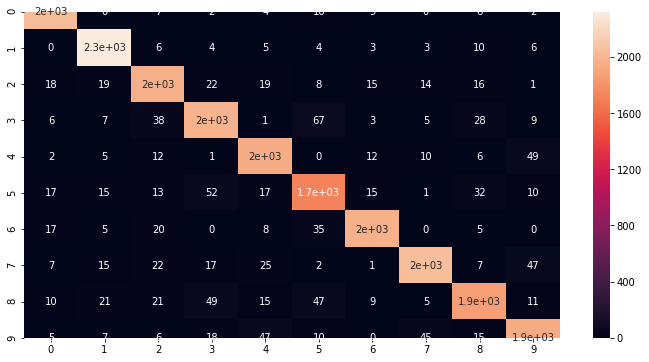

In [33]:
test_svm(X_train, X_test, y_train, y_test, labels)

In [35]:
def test_lr(X_train, X_test, y_train, y_test, label):
    model_lr = LogisticRegression(multi_class='ovr', penalty='l2', C=100.0, solver='saga')
    clf = OneVsRestClassifier(model_lr)
    clf.fit(X_train, y_train)
    
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    
    print("y_pred : ", y_pred, "\n\n")
    print("predicting time : ", end_time - start_time)
    
    cv_report = classification_report(y_test, y_pred, labels=label)
    print("cv_report\n", cv_report)
    
    res_SVM = []
    res_SVM.append([accuracy_score(y_test, y_pred),
              precision_score(y_test, y_pred, average="macro"),
              recall_score(y_test, y_pred, average="macro"),
              f1_score(y_test, y_pred, average="macro")])
    
    # scores
    res_pd = pd.DataFrame(res_SVM, columns = ["Accuracy", "Precision", "Recall", "F1-score"], index=["LR"])
    print(res_pd)
    
    # confusion matrix
    cmat = confusion_matrix(y_test, y_pred, target_name)
    sns.set_palette("husl")
    plt.figure(figsize=(12,6))
    sns.heatmap(cmat, annot=True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

y_pred :  ['3' '6' '1' ... '2' '4' '9'] 


predicting time :  0.11055803298950195


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:564: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


cv_report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2071
           1       0.88      0.97      0.93      2363
           2       0.92      0.86      0.89      2097
           3       0.90      0.87      0.88      2142
           4       0.87      0.91      0.89      2047
           5       0.87      0.84      0.86      1894
           6       0.92      0.93      0.93      2063
           7       0.90      0.90      0.90      2188
           8       0.87      0.82      0.84      2048
           9       0.87      0.86      0.86      2087

   micro avg       0.89      0.89      0.89     21000
   macro avg       0.89      0.89      0.89     21000
weighted avg       0.89      0.89      0.89     21000

    Accuracy  Precision    Recall  F1-score
LR  0.893524    0.89332  0.892042  0.892141


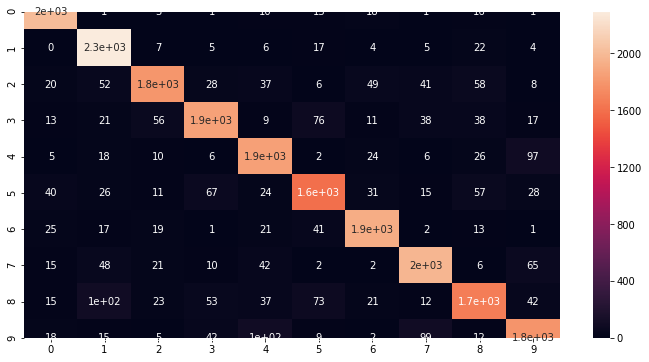

In [36]:
test_lr(X_train, X_test, y_train, y_test, labels)

In [37]:
%%time
model_svm = SVC(kernel='linear', C=0.01)
model_svm.fit(X_train, y_train)

CPU times: user 2min 43s, sys: 28 ms, total: 2min 43s
Wall time: 2min 43s


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
%%time
model_lr = LogisticRegression(multi_class='ovr', penalty='l2', C=100.0, solver='saga')
ovrc_lr = OneVsRestClassifier(model_lr)
ovrc_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

CPU times: user 7min, sys: 4.11 ms, total: 7min
Wall time: 7min 1s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=100.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='saga', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [60]:
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
lr_score = model_lr.decision_function(X_train)
lr_score

array([[-3.92600933, -4.77909183, -4.85570473, ..., -3.40370462,
        -2.6264798 ,  2.74021159],
       [-3.73488129, -2.17363492, -3.93181053, ..., -3.32644103,
        -2.88203166, -5.43914395],
       [-3.12231173, -5.33007643,  2.40450456, ..., -3.78762418,
        -0.77276514, -1.04566056],
       ...,
       [-5.02401296,  0.7992059 , -3.46816841, ..., -3.52071592,
        -4.01273055, -1.31631591],
       [-2.42134222, -5.61321541, -8.52318767, ..., -4.46782881,
        -2.66853011, -3.50721441],
       [-3.2346209 , -4.98056118, -1.57462695, ..., -1.17827544,
        -4.49306923, -6.88410305]])

In [64]:
svm_score = model_svm.decision_function(X_train)
svm_score

array([[ 1.69456765, -0.32347153,  2.70743693, ...,  7.30486419,
         6.31020068,  9.32389215],
       [ 2.70753074,  7.26012244,  2.6963584 , ...,  1.71634494,
         8.31280856,  2.69419702],
       [ 2.70140811,  1.68578334,  9.32449433, ...,  2.72059914,
         8.31203685,  3.71674827],
       ...,
       [-0.32052459,  8.31056396,  3.8439238 , ...,  6.26360044,
         5.24768588,  6.30047886],
       [ 5.23656862,  0.67650278,  1.68548638, ...,  4.23172933,
         7.31764156,  5.29366968],
       [ 7.30362941, -0.32370289,  7.31985862, ...,  4.27886256,
         1.69014563,  1.71250356]])

In [97]:
svm_score_proba = model_svm.predict_proba(X_train)
svm_score_proba

AttributeError: predict_proba is not available when  probability=False

In [43]:
y_train.shape

(49000,)

In [65]:
lr_score[:,1].shape

(49000,)

In [66]:
lr_score.shape

(49000, 10)

In [70]:
lr_avg_score = []
for i in range(49000):
    lr_avg_score.append([np.mean(lr_score[i,:])])
lr_avg_score = np.array(lr_avg_score)
lr_avg_score.shape

(49000, 1)

In [76]:
svm_avg_score = []
for i in range(49000):
    svm_avg_score.append([np.mean(svm_score[i,:])])
svm_avg_score = np.array(svm_avg_score)
svm_avg_score.shape

(49000, 1)

In [74]:
lr_score[:,1]

array([-4.77909183, -2.17363492, -5.33007643, ...,  0.7992059 ,
       -5.61321541, -4.98056118])

In [75]:
lr_avg_score

array([[-3.26405272],
       [-3.15990113],
       [-3.26320723],
       ...,
       [-2.98162984],
       [-3.508643  ],
       [-3.77221607]])

In [71]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, lr_avg_score, pos_label=1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [77]:
fpr2, tpr2, thresholds2 = roc_curve(y_train, svm_avg_score, pos_label=1)

In [78]:
print(fpr1, tpr1, thresholds1)
print(fpr2, tpr2, thresholds2)

[0.00000000e+00 2.04081633e-05 1.00000000e+00] [nan nan nan] [-0.49744798 -1.49744798 -5.91533375]
[0.00000000e+00 2.04081633e-05 1.00000000e+00] [nan nan nan] [5.674099   4.674099   4.32245846]


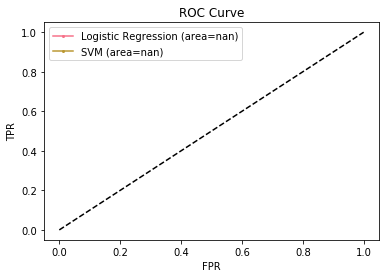

In [79]:
plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression (area=%0.2f)" % auc(fpr1, tpr1))
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM (area=%0.2f)" % auc(fpr2, tpr2))
plt.legend()
plt.plot([0,1], [0,1], 'k--', label="random guess")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [90]:
def drawCoefMap(clf):
    scale = np.abs(clf.coef_).max()
    fig=plt.figure(figsize=(15,10))
    for i in range(10):
        ax=fig.add_subplot(1,10,i+1)
        mat=clf.coef_[i].reshape(28,28)
        ax.imshow(mat, cmap=plt.cm.RdBu_r, vmin=-scale, vmax=scale)
        ax.set_title(i)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.show()

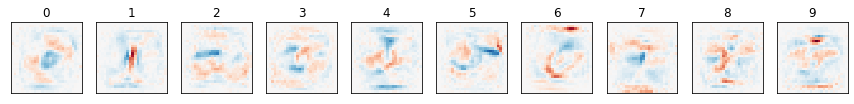

In [91]:
drawCoefMap(model_lr)

In [93]:
model_svm.n_support_

array([ 501,  513, 1063, 1174,  893, 1230,  628,  917, 1318, 1278],
      dtype=int32)

In [94]:
model_svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

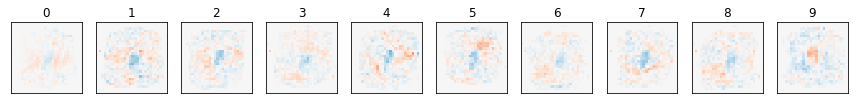

In [96]:
drawCoefMap(model_svm)